### **Task-01**

 Determine the percentage of restaurants that
 offer table booking and online delivery.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Dataset .csv')

In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
table_booking = df['Has Table booking'].value_counts()
table_booking

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [ ]:
total_restaurants = len(df)
total_restaurants

9551

In [ ]:
( table_booking / total_restaurants ) * 100

No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64

** restaurants that offer table booking is 14%**

In [ ]:
online_delivery = df['Has Online delivery'].value_counts()
online_delivery

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [ ]:
( online_delivery / total_restaurants ) * 100

No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

** restaurants that offer table booking is 26%**

** # average ratings of restaurants with table booking and those without. **

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
avg_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_with_booking


3.4419689119170984

In [ ]:
avg_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
avg_rating_without_booking

2.559358989634219

** #availability of online delivery among restaurants with different price ranges.**

In [ ]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [ ]:
online_delivery_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
online_delivery_price_range


Has Online delivery,No,Yes
Price range,,
1,84.225923,15.774077
2,58.689367,41.310633
3,70.809659,29.190341
4,90.955631,9.044369


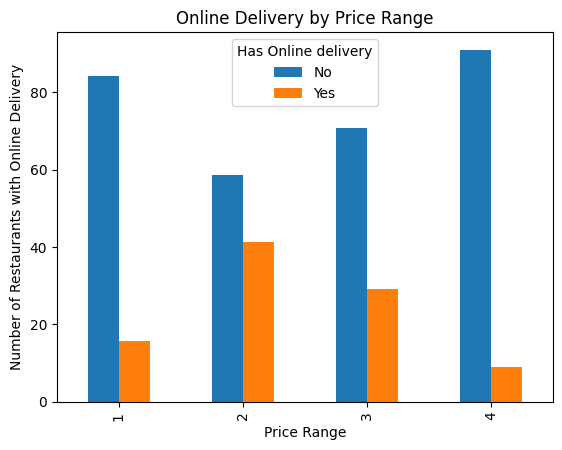

In [ ]:
online_delivery_price_range.plot(kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants with Online Delivery')
plt.title('Online Delivery by Price Range')
plt.show()

### **Task-2**

 Determine the most common price range
 among all the restaurants.
 Calculate the average rating for each price
 range.
 Identify the color that represents the highest
 average rating among different price ranges.

In [ ]:
most_common_price_range = df['Price range'].mode()
most_common_price_range


0    1
Name: Price range, dtype: int64

In [ ]:
average_rating_by_price_range = df.groupby('Price range')['Votes'].mean()
average_rating_by_price_range

Price range
1     44.597435
2    147.607131
3    443.860795
4    368.595563
Name: Votes, dtype: float64

In [ ]:
highest_rating_color = average_rating_by_price_range.idxmax()
highest_rating_color

3

### **Task-3**

Task: Feature Engineering
 Extract additional features from the existing
 columns, such as the length of the restaurant
 name or address.
 Create new features like "Has Table Booking"
 or "Has Online Delivery" by encoding
 categorical variables.

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df['NameLength'] = df['Restaurant Name'].apply(len)
df['NameLength']

0       16
1       16
2       22
3        4
4       11
        ..
9546    11
9547    12
9548     5
9549    11
9550    24
Name: NameLength, Length: 9551, dtype: int64

In [ ]:
# new feature Has Online Delivery-labelling
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
le.fit(df['Has Online delivery'])

LabelEncoder()

In [ ]:
df['Has Online delivery'] = le.transform(df['Has Online delivery'])

In [ ]:
df['Has Online delivery'].head()

0    0
1    0
2    0
3    0
4    0
Name: Has Online delivery, dtype: int64

In [ ]:
df['Has Online delivery'].value_counts()

0    7100
1    2451
Name: Has Online delivery, dtype: int64

In [ ]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           